<a href="https://colab.research.google.com/github/kiarashfz/pytorch_image_classification/blob/master/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch
!pip install torchvision
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = datasets.MNIST('treinset/', download=True, train=True, transform=transform)
valset = datasets.MNIST('valset/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting treinset/MNIST/raw/train-images-idx3-ubyte.gz to treinset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting treinset/MNIST/raw/train-labels-idx1-ubyte.gz to treinset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting treinset/MNIST/raw/t10k-images-idx3-ubyte.gz to treinset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting treinset/MNIST/raw/t10k-labels-idx1-ubyte.gz to treinset/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting valset/MNIST/raw/train-images-idx3-ubyte.gz to valset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting valset/MNIST/raw/train-labels-idx1-ubyte.gz to valset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting valset/MNIST/raw/t10k-images-idx3-ubyte.gz to valset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting valset/MNIST/raw/t10k-labels-idx1-ubyte.gz to valset/MNIST/raw



In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


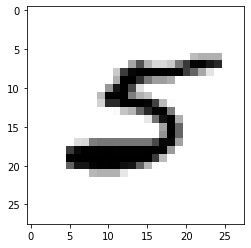

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

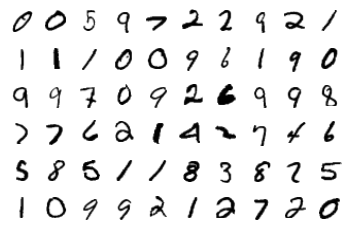

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [9]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [10]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        ...,
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053]])


In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6420049735112612
Epoch 1 - Training loss: 0.28337138407091217
Epoch 2 - Training loss: 0.21970652481481465
Epoch 3 - Training loss: 0.17615102479722836
Epoch 4 - Training loss: 0.14754768818823386
Epoch 5 - Training loss: 0.1257504541585758
Epoch 6 - Training loss: 0.11048985815056955
Epoch 7 - Training loss: 0.09822400730115169
Epoch 8 - Training loss: 0.089644088619339
Epoch 9 - Training loss: 0.08016988388481124
Epoch 10 - Training loss: 0.07213432719903205
Epoch 11 - Training loss: 0.06746656782101038
Epoch 12 - Training loss: 0.06235306173203581
Epoch 13 - Training loss: 0.05779162981186999
Epoch 14 - Training loss: 0.05234900953571822

Training Time (in minutes) = 3.3168608864148457


In [12]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


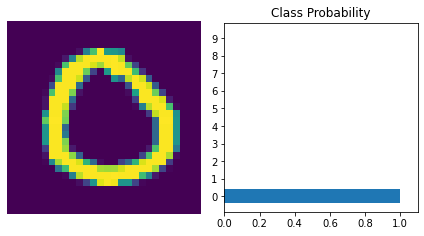

In [13]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [14]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9748


In [15]:
torch.save(model, './my_mnist_model.pt')

In [16]:
ls

my_mnist_model.pt  sample_data/  treinset/  valset/
